In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve,convolve2d
import math

SSD or Normalized correlation

In [8]:
vidcap = cv2.VideoCapture(r'/Users/udithracha/Desktop/shruthi/Assignment 3/video copy.mp4')
success,image = vidcap.read()
count = 0
while success:
    success,image = vidcap.read()
    if count%30==0 :
        image=cv2.flip(image,-1)
        cv2.imwrite(r'/Users/udithracha/Desktop/shruthi/Assignment 3/frame%d.jpg' % count, image)     # save frame as JPEG file      
        print('Read a new frame: ', success)
    count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True


In [9]:
def ssd(A,B):
    squares = (A[:,:,:3] - B[:,:,:3]) ** 2
    return math.sqrt(np.sum(squares))

In [10]:
def norm_data(data):
    mean_data=np.mean(data)
    std_data=np.std(data, ddof=1)
    return (data-mean_data)/(std_data)


def ncc(data0, data1):
    return (1.0/(data0.size-1)) * np.sum(norm_data(data0)*norm_data(data1))

In [11]:
import cv2

imdir = r'/Users/udithracha/Desktop/shruthi/Assignment 3/'
ext = ['png', 'jpg', 'gif']    # Add image formats here

files = []
files.extend(glob.glob(imdir + '*.' + 'jpg'))

images = [cv2.imread(file) for file in files]
print(files)

['/Users/udithracha/Desktop/shruthi/Assignment 3/frame150.jpg', '/Users/udithracha/Desktop/shruthi/Assignment 3/frame90.jpg', '/Users/udithracha/Desktop/shruthi/Assignment 3/frame180.jpg', '/Users/udithracha/Desktop/shruthi/Assignment 3/frame330.jpg', '/Users/udithracha/Desktop/shruthi/Assignment 3/frame30.jpg', '/Users/udithracha/Desktop/shruthi/Assignment 3/frame120.jpg', '/Users/udithracha/Desktop/shruthi/Assignment 3/frame240.jpg', '/Users/udithracha/Desktop/shruthi/Assignment 3/frame270.jpg', '/Users/udithracha/Desktop/shruthi/Assignment 3/frame0.jpg', '/Users/udithracha/Desktop/shruthi/Assignment 3/frame300.jpg', '/Users/udithracha/Desktop/shruthi/Assignment 3/frame210.jpg', '/Users/udithracha/Desktop/shruthi/Assignment 3/frame360.jpg', '/Users/udithracha/Desktop/shruthi/Assignment 3/frame60.jpg']


(640, 352, 3)


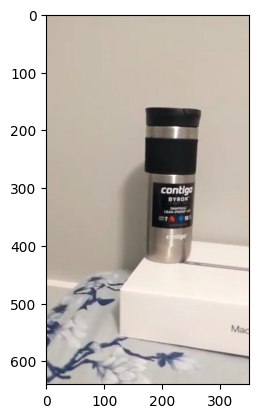

In [12]:
plt.imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))
print(images[0].shape)

True

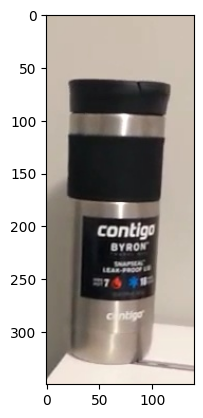

In [14]:
cropped_image = images[2][100:450,150:290]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

cv2.imwrite("Cropped Image.jpg", cropped_image)

In [21]:
d=dict()
d_norm=dict()
for i in range(0,290,20):
    for j in range(0,212,20):
        #print(i,j)
        #print(i+130,j+160)
        d[str(i)+":"+str(i+350),str(j)+":"+str(j+140)]=ssd(cropped_image,images[6][i:i+350,j:j+140])
        #d_norm[str(i)+":"+str(i+100),str(j)+":"+str(j+100)]=ncc(norm_data(cropped_image),norm_data(images[0][i:i+100,j:j+100]))

In [22]:
a=min(d.items(), key=lambda x: x[1])
y1,y2=map(int,a[0][0].split(':'))
x1,x2=map(int,a[0][1].split(':'))

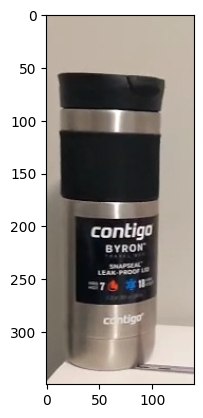

In [23]:
plt.imshow(cv2.cvtColor(images[6][y1:y2,x1:x2], cv2.COLOR_BGR2RGB))

In [26]:
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(images[6], (x1,y1), (x2,y2), color, thickness)

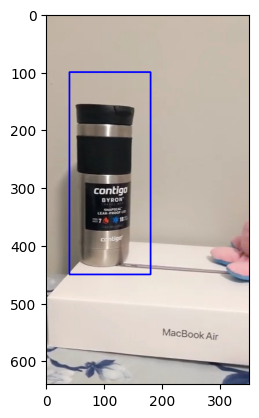

In [27]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

2. Motion Traking Equations

In [53]:
Iref=cv2.imread('/Users/udithracha/Desktop/shruthi/Assignment 3/frame0.jpg',cv2.IMREAD_GRAYSCALE)
Inext=cv2.imread('/Users/udithracha/Desktop/shruthi/Assignment 3/frame30.jpg',cv2.IMREAD_GRAYSCALE)
Iref=np.array(Iref).astype(np.float32)
Inext=np.array(Inext).astype(np.float32)
kernel_x = np.array([[-1., 1.], [-1., 1.]])*.25
kernel_y = np.array([[-1., -1.], [1., 1.]])*.25
kernel_t = np.array([[1., 1.], [1., 1.]])*.25
Iref = Iref / 255. # normalize pixels
Inext = Inext / 255. # normalize pixels
Ix=cv2.filter2D(Iref,-1,kernel=kernel_x)
Iy=cv2.filter2D(Iref,-1,kernel=kernel_y)
It=cv2.filter2D(Iref,-1,kernel=kernel_t)+cv2.filter2D(Inext,-1,kernel=kernel_x)
Ix,Iy,It=np.array(Ix),np.array(Iy),np.array(It)

In [55]:
u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))

/var/folders/p9/5b7hy6ys46v0xw3rz0f3ttt80000gn/T/ipykernel_73655/3143559099.py:1: RuntimeWarning: divide by zero encountered in divide
  u=np.divide(It,np.sqrt(np.square(Ix)+np.square(Iy)))


In [56]:
u

array([[      inf,       inf,       inf, ..., 567.0997 ,       inf,
              inf],
       [      inf,       inf,       inf, ..., 567.09534,       inf,
              inf],
       [      inf,       inf,       inf, ...,       inf,       inf,
              inf],
       ...,
       [      inf,       inf,       inf, ..., 620.83984, 278.5967 ,
        313.6019 ],
       [      inf,       inf,       inf, ..., 196.99821, 198.33864,
        223.25002],
       [      inf,       inf,       inf, ..., 209.06845, 200.12749,
        225.25002]], dtype=float32)

3. Dense Optical Flow

In [9]:
import cv2 as cv
import numpy as np


# The video feed is read in as
# a VideoCapture object
cap = cv.VideoCapture("/Users/udithracha/Desktop/shruthi/Assignment 3/video copy.mp4")
ret, first_frame = cap.read()
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)
mask[..., 1] = 255
count=0
while(cap.isOpened() and count<30):

    ret, frame = cap.read()
    count+=1
    print(count)
    # Opens a new window and displays the input
    # frame
    frame=cv.flip(frame,0)
    cv.imshow("input", frame)
    
#cv2.destroyAllWindows()
    
    # Converts each frame to grayscale - we previously
    # only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray,None,0.5, 3, 15, 3, 5, 1.2, 0)

    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
    # Sets image hue according to the optical flow
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
    
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
    
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
    
    # Opens a new window and displays the output frame
    cv.imshow("dense optical flow", rgb)
    
    # Updates previous frame
    prev_gray = gray
    
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# The following frees up resources and
# closes all windows
cap.release()
cv.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


4. Multiple Face Tracking

In [4]:
import os
import time
import cv2

import imutils
detectorPaths = {
    
    "face": "/Users/udithracha/Desktop/shruthi/Assignment 3/face.xml",
    "smile": "/Users/udithracha/Desktop/shruthi/Assignment 3/smile.xml",
}

print("[INFO] loading haar cascades...")
detectors = dict()
 
for (name, path) in detectorPaths.items():
    detectors[name] = cv2.CascadeClassifier(path)

print("[INFO] starting video stream...")
vs = cv2.VideoCapture(0)

while True:
    _,frame = vs.read()
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faceRects = detectors["face"].detectMultiScale(
        gray, scaleFactor=1.05, minNeighbors=5, minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE)

    for (fX, fY, fW, fH) in faceRects:
        faceROI = gray[fY:fY + fH, fX:fX + fW]
        smileRects = detectors["smile"].detectMultiScale(
            faceROI, scaleFactor=1.1, minNeighbors=10,
            minSize=(15, 15), flags=cv2.CASCADE_SCALE_IMAGE)
        for (sX, sY, sW, sH) in smileRects:
            ptA = (fX + sX, fY + sY)
            ptB = (fX + sX + sW, fY + sY + sH)
            cv2.rectangle(frame, ptA, ptB, (255, 0, 0), 2)
        cv2.rectangle(frame, (fX, fY), (fX + fW, fY + fH),
                      (0, 255, 0), 2)
    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) == ord("q"):
        break

cv2.destroyAllWindows()


[INFO] loading haar cascades...
[INFO] starting video stream...


In [ ]:
cv2.destroyAllWindows()


In [21]:
cv2.destroyAllWindows()


In [1]:
pip install cv2

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
ul,vl=721,108 # from matlab ginput()
ur,vr=20,110
b=546.1 # distance between left and right cameras
f=1403.54736624058 #focallength
z=(b*f)/(ul-ur) #distance of object
print('The distance is '+str(z)+'mm')

The distance is 1093.4054446561781mm


In [62]:
pip install imutils

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=b74a52c602cd49b9db6a4205bc5516b2aee3dd6381194ede8b419b189fe7f2d7
  Stored in directory: /Users/udithracha/Library/Caches/pip/wheels/4b/a5/2d/4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
#On running the code block output is shown

def opticalFlow(referenceFrameSec):
    cap = cv2.VideoCapture("/Users/udithracha/Desktop/shruthi/Assignment 3/video copy.mp4")
    ret, first_frame = cap.read()
    prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    mask = np.zeros_like(first_frame)
    mask[..., 1] = 255
    i=1
    while(cap.isOpened()):
        ret, frame = cap.read()
        cv2.imshow("Input Window", frame)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Calculates dense optical flow by Farneback method
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray,None,0.5, 3, 15, 3, 5, 1.2, 0)
        # Computes the magnitude and angle of the 2D vectors
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        # Sets image hue according to the optical flow
        # direction
        mask[..., 0] = angle * 180 / np.pi / 2
        # Sets image value according to the optical flow
        # magnitude (normalized)
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        # Converts HSV to RGB (BGR) color representation
        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
        #pens a new window and displays the output frame
        cv2.imshow("dense optical flow", rgb)
        # Updates previous frame
        if (referenceFrameSec == 1):
            prev_gray = gray
        elif (referenceFrameSec != 1):
            if i%referenceFrameSec == 0:
                prev_gray = gray    
        if(i%30 ==0 ):
            plt.axis('off')
            plt.imshow(rgb,cmap='gray', vmin=0, vmax=255)
            plt.show()
                
        i=i+1
        # Frames are read by intervals of 1 millisecond. The
        # programs breaks out of the while loop when the
        # user presses the 'q' key
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


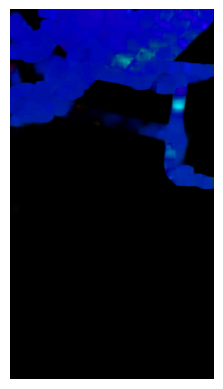

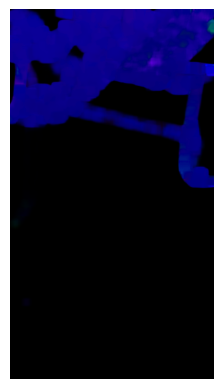

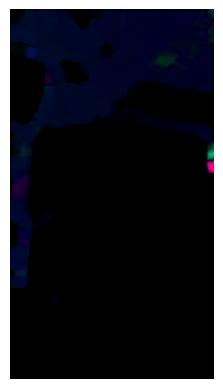

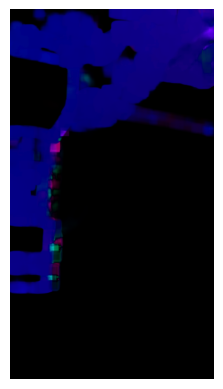

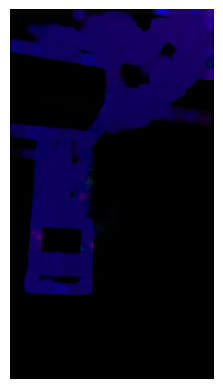

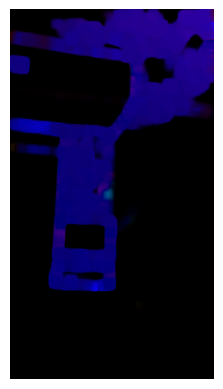

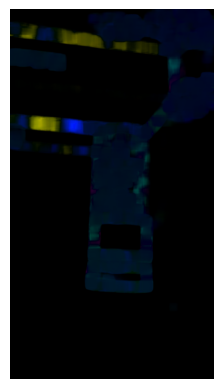

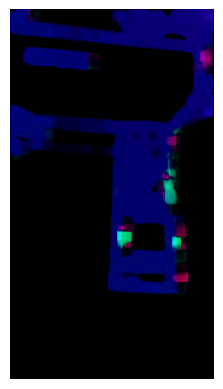

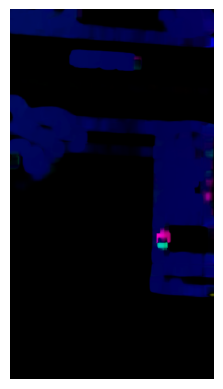

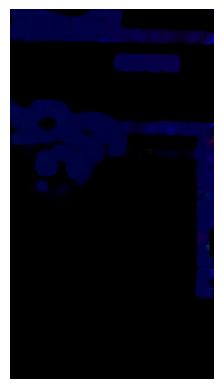

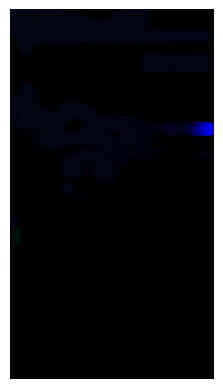

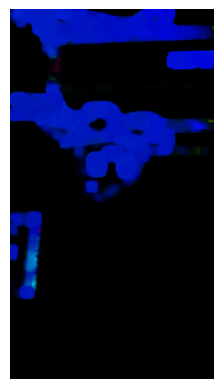

error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [19]:
#i) Fir every previous frame as reference
#Snapshots of dense optical flow is taken every 30 sec of video and printed below for reference
opticalFlow(11)


In [4]:
import cv2

In [6]:
import np

ModuleNotFoundError: No module named 'np'

In [12]:
import numpy as np

In [14]:
import matplotlib as plt

In [16]:
import _aix_support as axis

In [18]:
import matplotlib.pyplot as plt 



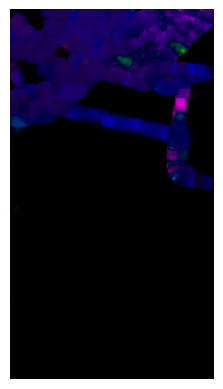

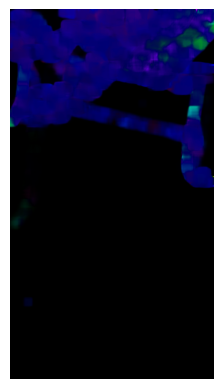

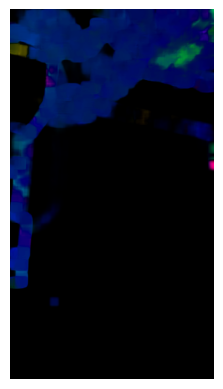

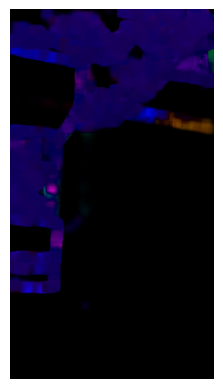

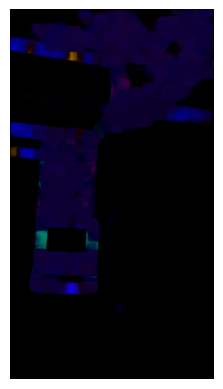

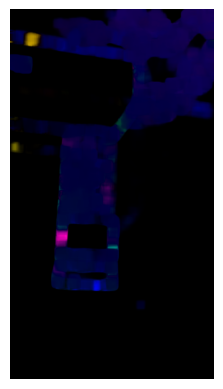

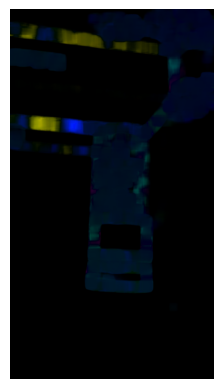

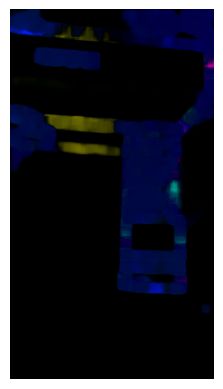

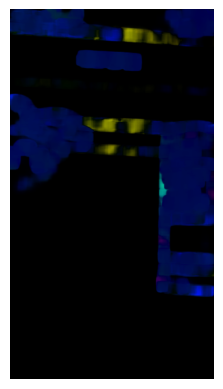

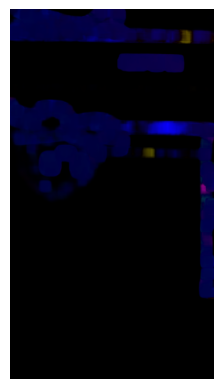

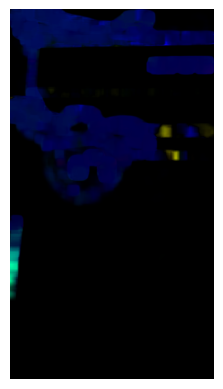

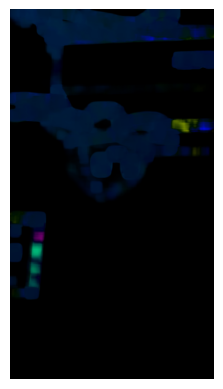

error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [20]:
#i) Fir every previous frame as reference
#Snapshots of dense optical flow is taken every 30 sec of video and printed below for reference
opticalFlow(1)


objects were found in this image.


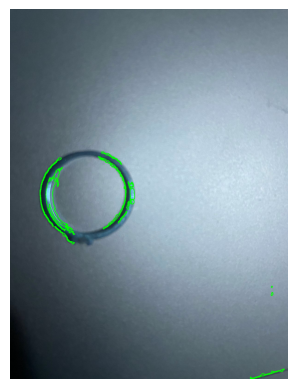

objects were found in this image.


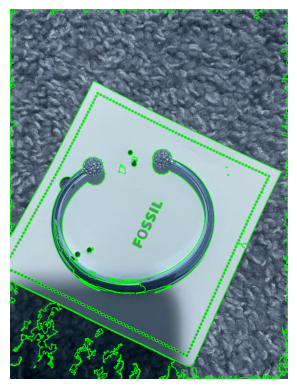

In [30]:
#Detecting objects from scratch using contour detection
def objectDetectionFromScratch(img):
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    edged = cv2.Canny(blurred, 10, 100)

    # define a (3, 3) structuring element
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # apply the dilation operation to the edged image
    dilate = cv2.dilate(edged, kernel, iterations=1)

    # find the contours in the dilated image
    contours, _ = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    image_copy = image.copy()
    # draw the contours on a copy of the original image
    cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
    print("objects were found in this image.")
    plt.axis('off')
    plt.imshow(image_copy,cmap='gray', vmin=0, vmax=255)
    plt.show()    
img1 = "/Users/udithracha/Desktop/shruthi/Assignment 3/image1.jpeg" 
img2 = "/Users/udithracha/Desktop/shruthi/Assignment 3/image2.jpeg"
objectDetectionFromScratch(img1)
objectDetectionFromScratch(img2)


In [26]:
cv2.destroyAllWindows()
